# Task 1 : Prediction using Supervised ML

### Problem Statement : Predict the percentage of an student based on the no. of study hours.What will be predicted score if a student studies for 9.25 hrs/ day?

In [72]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
#Reading data
url="http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data taken in")
data.head(10)

Data taken in


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


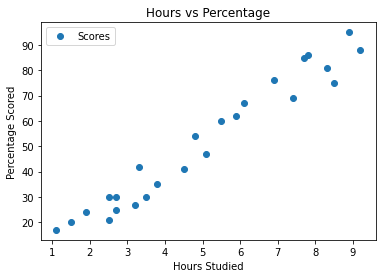

In [7]:
#Plotting the data in 2D to understand the relation between hours studied and scores.
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.show()

In [26]:
# divide the data into "attributes" (inputs) and "labels" (outputs)
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [27]:
#split this data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [39]:
#train the algorithm
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train, y_train)

print("Trained.")

Trained.


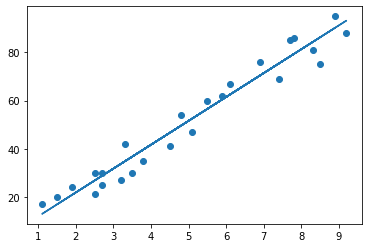

In [41]:
# Plotting the regression line and test data
line=regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

In [61]:
#make some predictions
print(x_test)
y_pred=regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [58]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [70]:
#testing with our own data
hours = 9.25
own_pred = round(regressor.predict([[9.25]]) [0],2)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred))

No of Hours = 9.25
Predicted Score = 93.69


In [71]:
#evaluate the performance of algorithm
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 4.18385989900298
Root Mean Squared Error: 4.647447612100368
